<a href="https://colab.research.google.com/github/jebbica/LevelData-Project-1B/blob/main/label_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive. mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# import needed libraries
import pandas as pd
import json
import matplotlib. pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression



In [66]:
#extract benchmarks with
with open('/content/drive/MyDrive/Level Data Datasets/District_18_pruned_score_averages3.csv') as scores_data:
  scores = pd.read_csv(scores_data)


#1. remove columns with zero values
# 2. remove rows with grade values that aren't 0-12

In [67]:
zero_columns = scores.columns[(scores == 0).all()]
scores = scores.loc[:, (scores != 0).any(axis=0)]
print((zero_columns.tolist()))

['subgroup_TCAPMathLevel', 'subGroup_bottom25', 'subgroup_lunchStatus']


In [68]:
scores = scores[scores['studentLevel'].isin([0,1,2,3,4,5,6,7,8,9,10,11,12 ])]

# separate each grade into its own dataframe
- grade_dfs['grade_x']

In [69]:
#separate each grade's students and scores into its own dataframe, accessible by grade_dfs['grade_x']

#dictionary to hold the new DataFrames
grade_dfs = {}

# Loop through each grade level and create a separate DataFrame
for grade in range(13):
    grade_dfs[f'grade_{grade}'] = scores[scores['studentLevel'] == grade].copy()

# Access individual DataFrames
# grade_0 = grade_dfs['grade_0']
# grade_1 = grade_dfs['grade_1']


In [70]:
grade_dfs['grade_10']

,id,user_IXL SS,user_IXL Science,user_IXL Math,user_IXL Reading,user_AR,subgroup_ell,user_Reflex M,subgroup_specialEd,subgroup_gender,...,value_edulasticWH,value_edulasticPhySci,value_edulasticGeography,value_edulasticEnvironmental,value_edulasticAP,value_edulasticGov,value_edulasticCivics,value_edulasticChem,value_edulasticEco,value_edulasticPreCal
17,4931319,0,0,0,0,0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN
60,4931335,0,0,2,2,0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,5443568,0,0,0,0,0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,4932154,0,0,2,2,0,0.0,0,0.0,0.0,...,86.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,6212678,0,0,2,2,0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436,7510530,0,0,0,0,0,0.0,0,0.0,0.0,...,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11473,7519409,0,0,0,0,0,0.0,0,0.0,0.0,...,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11480,7519410,0,0,0,0,0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11487,7515693,0,0,0,0,0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN


# create zscores for each test across each student
-  append result to grade_dfs['grade_x']


In [71]:
#extract test columns to calculate different zscores/means/stds
score_columns = [
   'value_lexileStar',
       'value_starReadingUnified', 'value_starMathUnified',
       'value_acapMathLevel', 'value_acapMath', 'value_acapELALevel',
       'value_acapELA', 'value_acapLexile', 'value_starReading',
       'value_starMath', 'value_AcapMathRc2', 'value_AcapMathRc3',
       'value_AcapMathRc1', 'value_AcapElaRc8', 'value_AcapElaRc7',
       'value_AcapElaRc5', 'value_AcapElaRc4', 'value_AcapElaRc3',
       'value_AcapElaRc2', 'value_AcapElaRc6', 'value_AcapElaRc1',
       'value_acapScienceLevel', 'value_acapScience', 'value_AcapMathRc4',
       'value_edulasticMath', 'value_edulasticELA', 'value_edulasticScience',
       'value_StudySyncELA', 'value_AcapSciRc3', 'value_AcapSciRc2',
       'value_AcapSciRc1', 'value_edulasticHistory',
       'value_starEarlyLitUnified', 'value_actMathScore',
       'value_actReadingScore', 'value_actEnglishScore',
       'value_actCompositeScore', 'value_actScienceScore',
       'value_StarEarlyLit', 'value_AcapMathRc5', 'value_AcapSciRc4',
       'value_AcapElaRc10', 'value_AcapElaRc9', 'value_actStemScore',
       'value_acapReadSubscore', 'value_edulasticUsHistory',
       'value_edulasticAlgebra', 'value_edulasticGeometry',
       'value_edulasticBio', 'value_edulasticWH', 'value_edulasticPhySci',
       'value_edulasticGeography', 'value_edulasticEnvironmental',
       'value_edulasticAP', 'value_edulasticGov', 'value_edulasticCivics',
       'value_edulasticChem', 'value_edulasticEco', 'value_edulasticPreCal'
]
len(score_columns)

59

In [72]:
#calculate zscores for each student's tests across each grade
#every student gets a zscore for each of their tests

#stats.zscore calculates the mean/std across the grade
#then calculates a zscore from the individual student's score

# Define a function to calculate z-scores and update the DataFrame
def calculate_zscores(scores_df, score_columns):
    # Identify columns that exist in the current DataFrame
    existing_columns = [col for col in score_columns if col in scores_df.columns]

    # Replace zeros with NaN for z-score calculation
    scores_df.loc[:, existing_columns] = scores_df[existing_columns].replace(0, np.nan)

    # Calculate z-scores for the relevant columns
    z_scores = scores_df[existing_columns].apply(lambda col: stats.zscore(col, nan_policy='omit'))

    # Create column names for the z-scores
    z_score_column_names = [col + '_Zscore' for col in existing_columns]

    # Create a DataFrame for the z-scores
    z_scores_df = pd.DataFrame(z_scores.values, columns=z_score_column_names, index=scores_df.index)

    # Concatenate the z-scores with the original DataFrame
    updated_scores_df = pd.concat([scores_df, z_scores_df], axis=1)

    # Return the updated DataFrame
    return updated_scores_df


# Calculate z-scores for each grade-level DataFrame
for grade in range(13):
    grade_dfs[f'grade_{grade}'] = calculate_zscores(grade_dfs[f'grade_{grade}'], score_columns)

# Print shapes of the updated DataFrames for confirmation
for grade in range(13):
    print(f"grade_{grade} shape: {grade_dfs[f'grade_{grade}'].shape}")


grade_0 shape: (784, 133)
grade_1 shape: (937, 133)
grade_2 shape: (870, 133)
grade_3 shape: (889, 133)
grade_4 shape: (832, 133)
grade_5 shape: (860, 133)
grade_6 shape: (965, 133)
grade_7 shape: (928, 133)
grade_8 shape: (961, 133)
grade_9 shape: (989, 133)
grade_10 shape: (935, 133)
grade_11 shape: (887, 133)
grade_12 shape: (633, 133)


In [73]:
# display(grade_dfs['grade_1'].style
#         .set_table_attributes('style="font-size: 14px; border-collapse: collapse;"')
#         .set_table_styles([{
#             'selector': 'th',
#             'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]
#         }]))

# calculate mean/std accross each grade
-  grades_mean_std['grade_x']

In [74]:
# create mean and standard deviation across grade for each test.
# do not include tests that are all NaN values
# each grade will have a different set of tests taken

# Dictionary to store results for each grade
grades_mean_std = {}

# Loop through each grade-specific DataFrame and calculate mean and standard deviation
for grade in range(13):
    scores_df = grade_dfs[f'grade_{grade}']

    # Identify columns that exist in the current DataFrame
    existing_columns = [col for col in score_columns if col in scores_df.columns]

    # Calculate mean and standard deviation
    mean_std_scores = scores_df[existing_columns].agg(['mean', 'std']).transpose()

    # Filter to exclude rows with NaN values
    mean_std_scores_filtered = mean_std_scores.dropna(how='any').copy()

    # Reset index to make it numbered and keep the current index as a new column
    mean_std_scores_filtered.reset_index(inplace=True)
    mean_std_scores_filtered.rename(columns={'index': 'dataSource'}, inplace=True)

    # Save results in the dictionary as DataFrames
    grades_mean_std[f"grade_{grade}"] = mean_std_scores_filtered

# Print shapes of the updated DataFrames for confirmation
for grade in range(13):
    print(f"grade_{grade} mean and std shape: {grades_mean_std[f'grade_{grade}'].shape}")


grade_0 mean and std shape: (8, 3)
grade_1 mean and std shape: (8, 3)
grade_2 mean and std shape: (29, 3)
grade_3 mean and std shape: (32, 3)
grade_4 mean and std shape: (34, 3)
grade_5 mean and std shape: (47, 3)
grade_6 mean and std shape: (42, 3)
grade_7 mean and std shape: (39, 3)
grade_8 mean and std shape: (43, 3)
grade_9 mean and std shape: (47, 3)
grade_10 mean and std shape: (19, 3)
grade_11 mean and std shape: (19, 3)
grade_12 mean and std shape: (15, 3)


In [75]:
grades_mean_std['grade_0']

,dataSource,mean,std
0,value_lexileStar,458.071174,226.762757
1,value_starReadingUnified,781.341270,95.468501
2,value_starMathUnified,869.500000,7.778175
3,value_starReading,114.492063,99.037079
4,value_starMath,427.000000,12.727922
5,value_StudySyncELA,78.000000,9.899495
6,value_starEarlyLitUnified,752.258592,65.361984
7,value_StarEarlyLit,610.361186,95.608914


# calculate the average zscore for each student across different subjects
- separate all tests into subject groups (ela, math, history, science)
- take the average of each student's zscores
- have that value be their average performance in that subject
- average_zscores_dict['grade_x_zscore_averages']

Note: lower grades have higher numbers of NaN values.

For example, grade_0 takes only 1 math test and 0 history/science classes

In [76]:
#Separate zscores into subject groups

# English Language Arts (ELA)
ela_zscores = [
    'value_lexileStar_Zscore', 'value_starReadingUnified_Zscore', 'value_acapELALevel_Zscore',
    'value_acapELA_Zscore', 'value_acapLexile_Zscore', 'value_starReading_Zscore',
    'value_StudySyncELA_Zscore', 'value_AcapElaRc1_Zscore', 'value_AcapElaRc2_Zscore',
    'value_AcapElaRc3_Zscore', 'value_AcapElaRc4_Zscore', 'value_AcapElaRc5_Zscore',
    'value_AcapElaRc6_Zscore', 'value_AcapElaRc7_Zscore', 'value_AcapElaRc8_Zscore',
    'value_AcapElaRc9_Zscore', 'value_AcapElaRc10_Zscore', 'value_acapReadSubscore_Zscore',
    'value_actReadingScore_Zscore', 'value_actEnglishScore_Zscore','value_starEarlyLitUnified_Zscore', 'value_StarEarlyLit_Zscore',

]

# Mathematics
math_zscores = [
    'value_starMathUnified_Zscore', 'value_acapMathLevel_Zscore', 'value_acapMath_Zscore',
    'value_starMath_Zscore', 'value_AcapMathRc1_Zscore', 'value_AcapMathRc2_Zscore',
    'value_AcapMathRc3_Zscore', 'value_AcapMathRc4_Zscore', 'value_AcapMathRc5_Zscore',
    'value_edulasticMath_Zscore', 'value_edulasticAlgebra_Zscore',
    'value_edulasticGeometry_Zscore', 'value_edulasticPreCal_Zscore','value_actMathScore_Zscore'
]

# Science
science_zscores = [
    'value_acapScienceLevel_Zscore', 'value_acapScience_Zscore', 'value_edulasticScience_Zscore',
    'value_AcapSciRc1_Zscore', 'value_AcapSciRc2_Zscore', 'value_AcapSciRc3_Zscore',
    'value_AcapSciRc4_Zscore', 'value_edulasticBio_Zscore', 'value_edulasticPhySci_Zscore',
    'value_edulasticChem_Zscore', 'value_edulasticEnvironmental_Zscore','value_actScienceScore_Zscore',
    'value_edulasticEco_Zscore'
]

# Social Studies / History
history_zscores = [
    'value_edulasticHistory_Zscore', 'value_edulasticUsHistory_Zscore', 'value_edulasticGeography_Zscore',
    'value_edulasticWH_Zscore', 'value_edulasticGov_Zscore', 'value_edulasticCivics_Zscore'
]


# Miscellaneous (uncategorized or unclear)
misc_zscores = [
    'value_edulasticAP_Zscore','value_actCompositeScore_Zscore','value_actStemScore_Zscore'
]


# Separate tests into subject groups

# English Language Arts (ELA)
ela = [
    'value_lexileStar', 'value_starReadingUnified', 'value_acapELALevel',
    'value_acapELA', 'value_acapLexile', 'value_starReading',
    'value_StudySyncELA', 'value_AcapElaRc1', 'value_AcapElaRc2',
    'value_AcapElaRc3', 'value_AcapElaRc4', 'value_AcapElaRc5',
    'value_AcapElaRc6', 'value_AcapElaRc7', 'value_AcapElaRc8',
    'value_AcapElaRc9', 'value_AcapElaRc10', 'value_acapReadSubscore',
    'value_actReadingScore', 'value_actEnglishScore', 'value_starEarlyLitUnified', 'value_StarEarlyLit'
]

# Mathematics
math = [
    'value_starMathUnified', 'value_acapMathLevel', 'value_acapMath',
    'value_starMath', 'value_AcapMathRc1', 'value_AcapMathRc2',
    'value_AcapMathRc3', 'value_AcapMathRc4', 'value_AcapMathRc5',
    'value_edulasticMath', 'value_edulasticAlgebra',
    'value_edulasticGeometry', 'value_edulasticPreCal', 'value_actMathScore'
]

# Science
science = [
    'value_acapScienceLevel', 'value_acapScience', 'value_edulasticScience',
    'value_AcapSciRc1', 'value_AcapSciRc2', 'value_AcapSciRc3',
    'value_AcapSciRc4', 'value_edulasticBio', 'value_edulasticPhySci',
    'value_edulasticChem', 'value_edulasticEnvironmental', 'value_actScienceScore',
    'value_edulasticEco'
]

# Social Studies / History
history = [
    'value_edulasticHistory', 'value_edulasticUsHistory', 'value_edulasticGeography',
    'value_edulasticWH', 'value_edulasticGov', 'value_edulasticCivics'
]

# Miscellaneous (uncategorized or unclear)
misc = [
    'value_edulasticAP', 'value_actCompositeScore', 'value_actStemScore'
]



In [77]:
#Calculate the average z-scores for ELA, Math, Science, and History for each grade-level DataFrame
#stores these averages in a new dictionary of DataFrames named `average_zscores_dict`.

# Dictionary to store average z-score DataFrames
average_zscores_dict = {}

# Calculate average z-score per student for each subject in each grade-level DataFrame
for grade in range(13):
    scores_level = grade_dfs[f'grade_{grade}']
    scores_level['avg_ela_zscore'] = scores_level[ela_zscores].mean(axis=1, skipna=True)
    scores_level['avg_math_zscore'] = scores_level[math_zscores].mean(axis=1, skipna=True)
    scores_level['avg_science_zscore'] = scores_level[science_zscores].mean(axis=1, skipna=True)
    scores_level['avg_history_zscore'] = scores_level[history_zscores].mean(axis=1, skipna=True)

    # Create a new DataFrame with average z-scores
    average_zscores = scores_level[['studentId', 'avg_ela_zscore', 'avg_math_zscore', 'avg_science_zscore', 'avg_history_zscore']]

    # Store the new DataFrame in the dictionary
    average_zscores_dict[f'grade_{grade}_zscore_averages'] = average_zscores

# Print shapes of the new DataFrames for confirmation
for grade in range(13):
    print(f"grade_{grade}_zscore_averages shape: {average_zscores_dict[f'grade_{grade}_zscore_averages'].shape}")


grade_0_zscore_averages shape: (784, 5)
grade_1_zscore_averages shape: (937, 5)
grade_2_zscore_averages shape: (870, 5)
grade_3_zscore_averages shape: (889, 5)
grade_4_zscore_averages shape: (832, 5)
grade_5_zscore_averages shape: (860, 5)
grade_6_zscore_averages shape: (965, 5)
grade_7_zscore_averages shape: (928, 5)
grade_8_zscore_averages shape: (961, 5)
grade_9_zscore_averages shape: (989, 5)
grade_10_zscore_averages shape: (935, 5)
grade_11_zscore_averages shape: (887, 5)
grade_12_zscore_averages shape: (633, 5)


In [78]:

display(average_zscores_dict['grade_10_zscore_averages'].style
        .set_table_attributes('style="font-size: 14px; border-collapse: collapse;"')
        .set_table_styles([{
            'selector': 'th',
            'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]
        }]))

,studentId,avg_ela_zscore,avg_math_zscore,avg_science_zscore,avg_history_zscore
17,1480135,-0.773741,-1.114423,-0.488773,-1.190863
60,1480184,-1.215645,-1.543830,-0.684524,-1.532148
83,1480209,-1.215645,-0.425626,-1.126266,-1.732903
105,1480235,-0.687203,-0.156545,0.136847,0.819673
118,1480248,-0.861431,-0.732293,-0.905395,nan
127,1480257,-0.682596,-0.694351,-0.195216,0.555709
131,1480261,0.635054,-0.285602,-0.944589,nan
192,1480326,-0.772590,-0.005554,-1.788880,-0.769277
230,1480375,nan,-1.015113,nan,nan
308,1480460,-0.682596,-0.909054,-0.634251,-0.407917


# Creating new benchmarks
- filter for benchmarks from 2023
- append 2023 benchmarks to each grade_x dataframe by grade
- find the zscore for the benchmarks (b_score)
- fill in NaNs with the average b_score by subject

store in benchmark_and_tests_dict['grade_x_benchmark_and_tests']

In [79]:
#extract benchmarks
with open('/content/drive/MyDrive/Level Data Datasets/district 18/benchmarks_202410011642.json') as benchmarks_data:
    data = json.load(benchmarks_data)
    records = data[next(iter(data))]  # Get the list of records
    benchmarks = pd.DataFrame(records)
benchmarks

,id,districtId,year,level,dataSource,value
0,120,18,2017,3,value_scantronMath,2355.0
1,121,18,2017,3,value_scantronReading,2562.0
2,122,18,2017,4,value_scantronMath,2492.0
3,123,18,2017,4,value_scantronReading,2673.0
4,124,18,2017,5,value_scantronMath,2583.0
...,...,...,...,...,...,...
830,49566,18,2023,12,value_actReadingScore,19.0
831,49570,18,2023,12,value_actScienceScore,20.0
832,49574,18,2023,12,value_actELA,19.0
833,5309553,18,2023,12,value_acapLexile,1185.0


In [80]:
#filter for 2023 benchmarks and drop unnecessary columns
benchmarks2023 = benchmarks[benchmarks['year'] == 2023]
benchmarks2023 = benchmarks2023.drop(columns=['id', 'districtId'], axis = 1)
benchmarks2023

,year,level,dataSource,value
594,2023,0,value_starReadingUnified,783.0
595,2023,0,value_starEarlyLitUnified,783.0
596,2023,0,value_acapLexile,190.0
597,2023,0,value_lexileStar,190.0
598,2023,1,value_starMathUnified,841.0
...,...,...,...,...
830,2023,12,value_actReadingScore,19.0
831,2023,12,value_actScienceScore,20.0
832,2023,12,value_actELA,19.0
833,2023,12,value_acapLexile,1185.0


In [81]:
# display(benchmarks2023.style
#         .set_table_attributes('style="font-size: 14px; border-collapse: collapse;"')
#         .set_table_styles([{
#             'selector': 'th',
#             'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]
#         }]))

In [82]:
#append benchmarks to test mean/std for grades 0-12
#tests with no benchmarks are marked as NaN

# Separate benchmarks2023 into grade-specific DataFrames
benchmarks2023_dfs = {}
for grade in range(13):
    benchmarks2023_dfs[f'grade_{grade}'] = benchmarks2023[benchmarks2023['level'] == grade].copy()

# Dictionary to store the combined DataFrames
benchmark_and_tests_dict = {}

# Combine benchmarks with means/stds
for grade in range(13):
    scores_level = grades_mean_std[f'grade_{grade}']
    benchmarks_level = benchmarks2023_dfs[f'grade_{grade}']

    # Merge the DataFrames on test name
    combined_df = pd.merge(scores_level, benchmarks_level, on='dataSource', how='left')

    # Store the combined DataFrame in the dictionary
    benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'] = combined_df

    benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'].rename(columns={'level': 'grade', 'value': 'benchmark'}, inplace=True)

# Print shapes of the combined DataFrames for confirmation
for grade in range(13):
    print(f"grade_{grade}_benchmark_and_tests shape: {benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'].shape}")


grade_0_benchmark_and_tests shape: (8, 6)
grade_1_benchmark_and_tests shape: (8, 6)
grade_2_benchmark_and_tests shape: (33, 6)
grade_3_benchmark_and_tests shape: (36, 6)
grade_4_benchmark_and_tests shape: (40, 6)
grade_5_benchmark_and_tests shape: (52, 6)
grade_6_benchmark_and_tests shape: (49, 6)
grade_7_benchmark_and_tests shape: (44, 6)
grade_8_benchmark_and_tests shape: (50, 6)
grade_9_benchmark_and_tests shape: (47, 6)
grade_10_benchmark_and_tests shape: (19, 6)
grade_11_benchmark_and_tests shape: (19, 6)
grade_12_benchmark_and_tests shape: (15, 6)


In [83]:
# Remove duplicate rows and print the count of duplicates before and after
for grade in range(13):
    # For benchmarks2023_dfs
    if f'grade_{grade}' in benchmarks2023_dfs:
        df = benchmarks2023_dfs[f'grade_{grade}']
        duplicates_before = df.duplicated().sum()
        benchmarks2023_dfs[f'grade_{grade}'] = df.drop_duplicates()
        duplicates_after = benchmarks2023_dfs[f'grade_{grade}'].duplicated().sum()
        print(f"benchmarks2023_dfs grade_{grade}: Duplicates before = {duplicates_before}, after = {duplicates_after}")

    # For benchmark_and_tests_dict
    if f'grade_{grade}_benchmark_and_tests' in benchmark_and_tests_dict:
        df = benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']
        duplicates_before = df.duplicated().sum()
        benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'] = df.drop_duplicates()
        duplicates_after = benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'].duplicated().sum()
        print(f"benchmark_and_tests_dict grade_{grade}_benchmark_and_tests: Duplicates before = {duplicates_before}, after = {duplicates_after}")


benchmarks2023_dfs grade_0: Duplicates before = 0, after = 0
benchmark_and_tests_dict grade_0_benchmark_and_tests: Duplicates before = 0, after = 0
benchmarks2023_dfs grade_1: Duplicates before = 0, after = 0
benchmark_and_tests_dict grade_1_benchmark_and_tests: Duplicates before = 0, after = 0
benchmarks2023_dfs grade_2: Duplicates before = 4, after = 0
benchmark_and_tests_dict grade_2_benchmark_and_tests: Duplicates before = 4, after = 0
benchmarks2023_dfs grade_3: Duplicates before = 4, after = 0
benchmark_and_tests_dict grade_3_benchmark_and_tests: Duplicates before = 4, after = 0
benchmarks2023_dfs grade_4: Duplicates before = 6, after = 0
benchmark_and_tests_dict grade_4_benchmark_and_tests: Duplicates before = 6, after = 0
benchmarks2023_dfs grade_5: Duplicates before = 5, after = 0
benchmark_and_tests_dict grade_5_benchmark_and_tests: Duplicates before = 5, after = 0
benchmarks2023_dfs grade_6: Duplicates before = 7, after = 0
benchmark_and_tests_dict grade_6_benchmark_and_test

In [84]:
benchmark_and_tests_dict['grade_2_benchmark_and_tests']

,dataSource,mean,std,year,grade,benchmark
0,value_lexileStar,360.289725,194.627766,2023.0,2.0,420.0
1,value_starReadingUnified,884.456907,79.236554,2023.0,2.0,938.0
2,value_starMathUnified,885.172053,46.271955,2023.0,2.0,936.0
3,value_acapMathLevel,2.459295,0.915125,2023.0,2.0,3.0
5,value_acapMath,518.623937,48.268667,2023.0,2.0,523.0
7,value_acapELALevel,2.760341,0.920921,2023.0,2.0,3.0
9,value_acapELA,512.033455,53.462314,2023.0,2.0,501.0
11,value_acapLexile,349.084906,156.699379,2023.0,2.0,420.0
12,value_starReading,267.152539,133.064444,NaN,NaN,NaN
13,value_starMath,466.497955,78.096248,NaN,NaN,NaN


In [85]:
#calculate bscore for each benchmark, in each grade dataframe
for grade in range(13):
  benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']['benchmark_zscore'] =  (benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']['benchmark'] - benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']['mean'])/benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']['std']

<ipython-input-85-ebb6da8cc7f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']['benchmark_zscore'] =  (benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']['benchmark'] - benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']['mean'])/benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']['std']


In [86]:
benchmark_and_tests_dict['grade_2_benchmark_and_tests']

# calc average distance away that the mean is from the benchmark
# use that to find the rest of the benchmarks
# average distance is the amount of STDs that the mean is away from the benchmarks

,dataSource,mean,std,year,grade,benchmark,benchmark_zscore
0,value_lexileStar,360.289725,194.627766,2023.0,2.0,420.0,0.306792
1,value_starReadingUnified,884.456907,79.236554,2023.0,2.0,938.0,0.675737
2,value_starMathUnified,885.172053,46.271955,2023.0,2.0,936.0,1.098461
3,value_acapMathLevel,2.459295,0.915125,2023.0,2.0,3.0,0.590854
5,value_acapMath,518.623937,48.268667,2023.0,2.0,523.0,0.090661
7,value_acapELALevel,2.760341,0.920921,2023.0,2.0,3.0,0.260239
9,value_acapELA,512.033455,53.462314,2023.0,2.0,501.0,-0.206378
11,value_acapLexile,349.084906,156.699379,2023.0,2.0,420.0,0.452555
12,value_starReading,267.152539,133.064444,NaN,NaN,NaN,NaN
13,value_starMath,466.497955,78.096248,NaN,NaN,NaN,NaN


In [87]:
# #fill bscores with NaN values with the average bscore across that grade's subject tests
# #if all tests in a subject have no benchmark, bscore will remain NaN
# #e.g., grade 0 has no benchmark scores for any math tests. so there are no bscores

# # Function to calculate and fill benchmark_zscores
# def fill_benchmark_zscores(benchmark_and_tests_dict, subject_groups):
#     # Loop through each grade-specific DataFrame
#     for grade in range(13):
#         df = benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']

#         # Initialize dictionaries to hold average benchmark_zscores for each subject
#         avg_benchmark_zscores = {subject: None for subject in subject_groups.keys()}

#         # Calculate the average benchmark_zscore for each subject
#         for subject, tests in subject_groups.items():
#             avg_benchmark_zscores[subject] = df[df['dataSource'].isin(tests)]['benchmark_zscore'].mean(skipna=True)

#         # Fill NaN values in benchmark_zscore based on subject-specific averages
#         for subject, tests in subject_groups.items():
#             mask = df['dataSource'].isin(tests) & df['benchmark_zscore'].isna()
#             df.loc[mask, 'benchmark_zscore'] = avg_benchmark_zscores[subject]

#         # Update the DataFrame in the dictionary
#         benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'] = df

#     return benchmark_and_tests_dict

# # Define the subject groups (already provided by you)
# subject_groups = {
#     'ela': [
#         'value_lexileStar', 'value_starReadingUnified', 'value_acapELALevel',
#         'value_acapELA', 'value_acapLexile', 'value_starReading',
#         'value_StudySyncELA', 'value_AcapElaRc1', 'value_AcapElaRc2',
#         'value_AcapElaRc3', 'value_AcapElaRc4', 'value_AcapElaRc5',
#         'value_AcapElaRc6', 'value_AcapElaRc7', 'value_AcapElaRc8',
#         'value_AcapElaRc9', 'value_AcapElaRc10', 'value_acapReadSubscore',
#         'value_actReadingScore', 'value_actEnglishScore', 'value_starEarlyLitUnified', 'value_StarEarlyLit'
#     ],
#     'math': [
#         'value_starMathUnified', 'value_acapMathLevel', 'value_acapMath',
#         'value_starMath', 'value_AcapMathRc1', 'value_AcapMathRc2',
#         'value_AcapMathRc3', 'value_AcapMathRc4', 'value_AcapMathRc5',
#         'value_edulasticMath', 'value_edulasticAlgebra',
#         'value_edulasticGeometry', 'value_edulasticPreCal', 'value_actMathScore'
#     ],
#     'science': [
#         'value_acapScienceLevel', 'value_acapScience', 'value_edulasticScience',
#         'value_AcapSciRc1', 'value_AcapSciRc2', 'value_AcapSciRc3',
#         'value_AcapSciRc4', 'value_edulasticBio', 'value_edulasticPhySci',
#         'value_edulasticChem', 'value_edulasticEnvironmental', 'value_actScienceScore',
#         'value_edulasticEco'
#     ],
#     'history': [
#         'value_edulasticHistory', 'value_edulasticUsHistory', 'value_edulasticGeography',
#         'value_edulasticWH', 'value_edulasticGov', 'value_edulasticCivics'
#     ],
#     'misc': [
#         'value_edulasticAP', 'value_actCompositeScore', 'value_actStemScore'
#     ]
# }

# # Apply the function to fill benchmark_zscore
# benchmark_and_tests_dict = fill_benchmark_zscores(benchmark_and_tests_dict, subject_groups)

# # Print shapes of the updated DataFrames for confirmation
# for grade in range(13):
#     print(f"grade_{grade}_benchmark_and_tests shape: {benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'].shape}")


In [88]:
# Function to calculate and fill benchmark_zscores
def fill_benchmark_zscores(benchmark_and_tests_dict, subject_groups):
    # Initialize a dictionary to hold the average benchmark_zscore for each test across all grades
    test_averages = {}

    # Calculate the global average benchmark_zscore for each test
    for grade in range(13):
        df = benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']
        for test in df['dataSource'].unique():
            if test not in test_averages:
                test_averages[test] = []
            test_averages[test].extend(df[df['dataSource'] == test]['benchmark_zscore'].dropna().tolist())

    # Calculate the mean for each test across all grades
    test_averages = {test: (sum(scores) / len(scores) if scores else None) for test, scores in test_averages.items()}

    # Loop through each grade-specific DataFrame to fill NaN values
    for grade in range(13):
        df = benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']

        # Fill NaN values in benchmark_zscore based on the global test-specific averages
        for test in df['dataSource'].unique():
            global_average = test_averages.get(test)
            if global_average is not None:
                mask = (df['dataSource'] == test) & df['benchmark_zscore'].isna()
                df.loc[mask, 'benchmark_zscore'] = global_average

        # Update the DataFrame in the dictionary
        benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'] = df

    return benchmark_and_tests_dict

# Define the subject groups (already provided by you)
subject_groups = {
    'ela': [
        'value_lexileStar', 'value_starReadingUnified', 'value_acapELALevel',
        'value_acapELA', 'value_acapLexile', 'value_starReading',
        'value_StudySyncELA', 'value_AcapElaRc1', 'value_AcapElaRc2',
        'value_AcapElaRc3', 'value_AcapElaRc4', 'value_AcapElaRc5',
        'value_AcapElaRc6', 'value_AcapElaRc7', 'value_AcapElaRc8',
        'value_AcapElaRc9', 'value_AcapElaRc10', 'value_acapReadSubscore',
        'value_actReadingScore', 'value_actEnglishScore', 'value_starEarlyLitUnified', 'value_StarEarlyLit'
    ],
    'math': [
        'value_starMathUnified', 'value_acapMathLevel', 'value_acapMath',
        'value_starMath', 'value_AcapMathRc1', 'value_AcapMathRc2',
        'value_AcapMathRc3', 'value_AcapMathRc4', 'value_AcapMathRc5',
        'value_edulasticMath', 'value_edulasticAlgebra',
        'value_edulasticGeometry', 'value_edulasticPreCal', 'value_actMathScore'
    ],
    'science': [
        'value_acapScienceLevel', 'value_acapScience', 'value_edulasticScience',
        'value_AcapSciRc1', 'value_AcapSciRc2', 'value_AcapSciRc3',
        'value_AcapSciRc4', 'value_edulasticBio', 'value_edulasticPhySci',
        'value_edulasticChem', 'value_edulasticEnvironmental', 'value_actScienceScore',
        'value_edulasticEco'
    ],
    'history': [
        'value_edulasticHistory', 'value_edulasticUsHistory', 'value_edulasticGeography',
        'value_edulasticWH', 'value_edulasticGov', 'value_edulasticCivics'
    ],
    'misc': [
        'value_edulasticAP', 'value_actCompositeScore', 'value_actStemScore'
    ]
}

# Apply the function to fill benchmark_zscore
benchmark_and_tests_dict = fill_benchmark_zscores(benchmark_and_tests_dict, subject_groups)

# Print shapes of the updated DataFrames for confirmation
for grade in range(13):
    print(f"grade_{grade}_benchmark_and_tests shape: {benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'].shape}")


grade_0_benchmark_and_tests shape: (8, 7)
grade_1_benchmark_and_tests shape: (8, 7)
grade_2_benchmark_and_tests shape: (29, 7)
grade_3_benchmark_and_tests shape: (32, 7)
grade_4_benchmark_and_tests shape: (34, 7)
grade_5_benchmark_and_tests shape: (47, 7)
grade_6_benchmark_and_tests shape: (42, 7)
grade_7_benchmark_and_tests shape: (39, 7)
grade_8_benchmark_and_tests shape: (43, 7)
grade_9_benchmark_and_tests shape: (47, 7)
grade_10_benchmark_and_tests shape: (19, 7)
grade_11_benchmark_and_tests shape: (19, 7)
grade_12_benchmark_and_tests shape: (15, 7)


In [89]:
benchmark_and_tests_dict['grade_2_benchmark_and_tests']

,dataSource,mean,std,year,grade,benchmark,benchmark_zscore
0,value_lexileStar,360.289725,194.627766,2023.0,2.0,420.0,0.306792
1,value_starReadingUnified,884.456907,79.236554,2023.0,2.0,938.0,0.675737
2,value_starMathUnified,885.172053,46.271955,2023.0,2.0,936.0,1.098461
3,value_acapMathLevel,2.459295,0.915125,2023.0,2.0,3.0,0.590854
5,value_acapMath,518.623937,48.268667,2023.0,2.0,523.0,0.090661
7,value_acapELALevel,2.760341,0.920921,2023.0,2.0,3.0,0.260239
9,value_acapELA,512.033455,53.462314,2023.0,2.0,501.0,-0.206378
11,value_acapLexile,349.084906,156.699379,2023.0,2.0,420.0,0.452555
12,value_starReading,267.152539,133.064444,NaN,NaN,NaN,NaN
13,value_starMath,466.497955,78.096248,NaN,NaN,NaN,NaN


In [90]:
#fill in reamining nan values in year and grade with their proper values
#calculate the benchmark for tests with no provided benchmarks using the mean, std, and bscore.
#subjects with no benchmarks will be filled with the mean value and bscore = 0
#store this new value in 'benchmark_calculated'

# Function to fill NaNs with the average value for specified columns
def fill_nans_with_average(df, columns):
    for column in columns:
        avg_value = df[column].mean()
        df[column] = df[column].fillna(avg_value)
    return df

# Apply the function to each grade-specific DataFrame in the dictionary
columns_to_fill = ['year', 'grade']

for grade in range(13):
    df = benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']
    benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'] = fill_nans_with_average(df, columns_to_fill)

# Print shapes of the updated DataFrames for confirmation
for grade in range(13):
    print(f"grade_{grade}_benchmark_and_tests shape: {benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'].shape}")

# Function to calculate benchmark score from mean, std, and benchmark_zscore, and fill NaNs in benchmark_zscore with 0
def reverse_engineer_benchmark(df):
    # Calculate benchmark only for non-NaN benchmark_zscores
    df['benchmark_calculated'] = df['benchmark_zscore'] * df['std'] + df['mean']
    # Fill NaNs in benchmark_calculated with values from mean column
    df['benchmark_calculated'] = df['benchmark_calculated'].fillna(df['mean'])
    # Fill NaNs in benchmark_zscore with 0
    df['benchmark_zscore'] = df['benchmark_zscore'].fillna(0)
    return df

# Apply the function to each grade-specific DataFrame in the dictionary
for grade in range(13):
    df = benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']
    benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests'] = reverse_engineer_benchmark(df)


grade_0_benchmark_and_tests shape: (8, 7)
grade_1_benchmark_and_tests shape: (8, 7)
grade_2_benchmark_and_tests shape: (29, 7)
grade_3_benchmark_and_tests shape: (32, 7)
grade_4_benchmark_and_tests shape: (34, 7)
grade_5_benchmark_and_tests shape: (47, 7)
grade_6_benchmark_and_tests shape: (42, 7)
grade_7_benchmark_and_tests shape: (39, 7)
grade_8_benchmark_and_tests shape: (43, 7)
grade_9_benchmark_and_tests shape: (47, 7)
grade_10_benchmark_and_tests shape: (19, 7)
grade_11_benchmark_and_tests shape: (19, 7)
grade_12_benchmark_and_tests shape: (15, 7)


In [91]:
benchmark_and_tests_dict['grade_0_benchmark_and_tests']

,dataSource,mean,std,year,grade,benchmark,benchmark_zscore,benchmark_calculated
0,value_lexileStar,458.071174,226.762757,2023.0,0.0,190.0,-1.182166,190.000000
1,value_starReadingUnified,781.341270,95.468501,2023.0,0.0,783.0,0.017375,783.000000
2,value_starMathUnified,869.500000,7.778175,2023.0,0.0,NaN,0.847724,876.093748
3,value_starReading,114.492063,99.037079,2023.0,0.0,NaN,0.000000,114.492063
4,value_starMath,427.000000,12.727922,2023.0,0.0,NaN,0.000000,427.000000
5,value_StudySyncELA,78.000000,9.899495,2023.0,0.0,NaN,0.153142,79.516028
6,value_starEarlyLitUnified,752.258592,65.361984,2023.0,0.0,783.0,0.470326,783.000000
7,value_StarEarlyLit,610.361186,95.608914,2023.0,0.0,NaN,0.424722,650.968367


In [92]:
benchmark_and_tests_dict['grade_2_benchmark_and_tests']

,dataSource,mean,std,year,grade,benchmark,benchmark_zscore,benchmark_calculated
0,value_lexileStar,360.289725,194.627766,2023.0,2.0,420.0,0.306792,420.000000
1,value_starReadingUnified,884.456907,79.236554,2023.0,2.0,938.0,0.675737,938.000000
2,value_starMathUnified,885.172053,46.271955,2023.0,2.0,936.0,1.098461,936.000000
3,value_acapMathLevel,2.459295,0.915125,2023.0,2.0,3.0,0.590854,3.000000
5,value_acapMath,518.623937,48.268667,2023.0,2.0,523.0,0.090661,523.000000
7,value_acapELALevel,2.760341,0.920921,2023.0,2.0,3.0,0.260239,3.000000
9,value_acapELA,512.033455,53.462314,2023.0,2.0,501.0,-0.206378,501.000000
11,value_acapLexile,349.084906,156.699379,2023.0,2.0,420.0,0.452555,420.000000
12,value_starReading,267.152539,133.064444,2023.0,2.0,NaN,0.000000,267.152539
13,value_starMath,466.497955,78.096248,2023.0,2.0,NaN,0.000000,466.497955


# Creating bscores across **average** zscores

In [93]:
#create new dict for average benchmark zscore values across each subject

# Dictionary to store average benchmark_zscores
average_benchmark_zscores_dict = {}

# Calculate average benchmark_zscore per grade for each subject
for grade in range(13):
    # Get the DataFrame for the grade
    benchmark_df = benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']

    # Create a dictionary to store subject averages
    subject_averages = {}

    # Calculate the average benchmark_zscore for each subject
    for subject, tests in subject_groups.items():
        # Filter only tests present in the benchmark DataFrame
        relevant_columns = [col for col in tests if col in benchmark_df['dataSource'].values]

        # Calculate the average for these columns
        subject_averages[f'avg_{subject}_benchmark_zscore'] = benchmark_df.loc[
            benchmark_df['dataSource'].isin(relevant_columns), 'benchmark_zscore'
        ].mean(skipna=True)

    # Convert the averages into a DataFrame
    average_benchmark_df = pd.DataFrame([subject_averages])

    #drop misc. column
    average_benchmark_df = average_benchmark_df.drop(columns=['avg_misc_benchmark_zscore'])

    # Store the DataFrame in the dictionary
    average_benchmark_zscores_dict[f'grade_{grade}_benchmark_zscores'] = average_benchmark_df

# Print the stored averages for verification
for grade in range(13):
    print(f"grade_{grade}_benchmark_zscores shape: {average_benchmark_zscores_dict[f'grade_{grade}_benchmark_zscores'].shape}")


grade_0_benchmark_zscores shape: (1, 4)
grade_1_benchmark_zscores shape: (1, 4)
grade_2_benchmark_zscores shape: (1, 4)
grade_3_benchmark_zscores shape: (1, 4)
grade_4_benchmark_zscores shape: (1, 4)
grade_5_benchmark_zscores shape: (1, 4)
grade_6_benchmark_zscores shape: (1, 4)
grade_7_benchmark_zscores shape: (1, 4)
grade_8_benchmark_zscores shape: (1, 4)
grade_9_benchmark_zscores shape: (1, 4)
grade_10_benchmark_zscores shape: (1, 4)
grade_11_benchmark_zscores shape: (1, 4)
grade_12_benchmark_zscores shape: (1, 4)


In [94]:
average_benchmark_zscores_dict['grade_10_benchmark_zscores']

,avg_ela_benchmark_zscore,avg_math_benchmark_zscore,avg_science_benchmark_zscore,avg_history_benchmark_zscore
0,0.85825,0.517434,0.377537,0.039944


In [95]:
average_zscores_dict['grade_10_zscore_averages']

,studentId,avg_ela_zscore,avg_math_zscore,avg_science_zscore,avg_history_zscore
17,1480135,-0.773741,-1.114423,-0.488773,-1.190863
60,1480184,-1.215645,-1.543830,-0.684524,-1.532148
83,1480209,-1.215645,-0.425626,-1.126266,-1.732903
105,1480235,-0.687203,-0.156545,0.136847,0.819673
118,1480248,-0.861431,-0.732293,-0.905395,NaN
...,...,...,...,...,...
11436,2513381,NaN,0.608491,-0.373849,0.134122
11473,2513421,NaN,-0.847085,1.076455,-1.853356
11480,2513428,NaN,NaN,NaN,NaN
11487,2513436,NaN,NaN,-2.113813,NaN


In [96]:
'''
calculate the average bscore per student for each subject
store in average_bscores_dict['grade_x_zscore_averages']
'''

# Initialize the dictionary to store the results
average_bscores_dict = {}

# Loop through each grade
for grade in range(13):
    # Fetch the grade-specific DataFrames from the zscore and benchmark zscore dicts
    zscores_df = average_zscores_dict[f'grade_{grade}_zscore_averages']
    benchmark_zscores_df = average_benchmark_zscores_dict[f'grade_{grade}_benchmark_zscores']

    # Create a new DataFrame to store the average bscores, starting with studentId
    average_bscores = pd.DataFrame()
    average_bscores['studentId'] = zscores_df['studentId']

    # Calculate average bscores for each subject
    for subject in ['ela', 'math', 'science', 'history']:
        # Get the zscore and benchmark zscore for the current subject
        zscore_col = f'avg_{subject}_zscore'
        benchmark_col = f'avg_{subject}_benchmark_zscore'

        # Ensure the benchmark value exists (benchmark DataFrame only has one row)
        if benchmark_col in benchmark_zscores_df.columns:
            benchmark_value = benchmark_zscores_df.iloc[0][benchmark_col]  # Single row
            average_bscores[f'average_{subject}_bscore'] = zscores_df[zscore_col] - benchmark_value

    # Add the calculated DataFrame to the average_bscores_dict
    average_bscores_dict[f'grade_{grade}'] = average_bscores


In [97]:
 average_bscores_dict['grade_10']

,studentId,average_ela_bscore,average_math_bscore,average_science_bscore,average_history_bscore
17,1480135,-1.631991,-1.631857,-0.866310,-1.230808
60,1480184,-2.073895,-2.061264,-1.062061,-1.572092
83,1480209,-2.073895,-0.943060,-1.503803,-1.772847
105,1480235,-1.545453,-0.673979,-0.240690,0.779728
118,1480248,-1.719681,-1.249727,-1.282932,NaN
...,...,...,...,...,...
11436,2513381,NaN,0.091057,-0.751386,0.094178
11473,2513421,NaN,-1.364519,0.698918,-1.893301
11480,2513428,NaN,NaN,NaN,NaN
11487,2513436,NaN,NaN,-2.491350,NaN


In [101]:
for grade in range(13):
    if grade == 1:
       average_bscores_dict[f'grade_{grade}'].to_csv(f'grade{grade}_average_bscores.csv', index=False)

<ipython-input-63-17a0ca5baa93>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-63-17a0ca5baa93>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-63-17a0ca5baa93>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-63-17a0ca5baa93>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


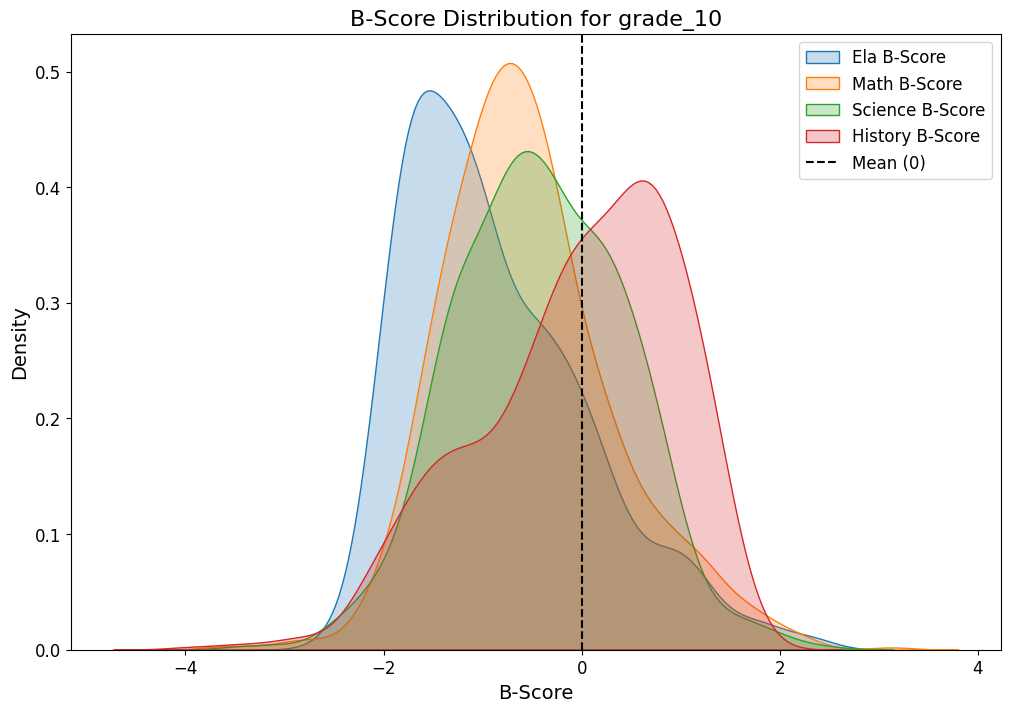

In [63]:
# Define the grade and fetch the DataFrame
grade = 'grade_10'  # Change this to the desired grade
df = average_bscores_dict[grade]

# Subjects to include
subjects = ['ela', 'math', 'science', 'history']

# Plot bscores with KDE for each subject
plt.figure(figsize=(12, 8))

for subject in subjects:
    column = f'average_{subject}_bscore'
    if column in df.columns:
        sns.kdeplot(
            df[column].dropna(),
            shade=True,
            label=f'{subject.capitalize()} B-Score'
        )

# Customize the plot
plt.title(f'B-Score Distribution for {grade}', fontsize=16)
plt.xlabel('B-Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.axvline(0, color='black', linestyle='--', label='Mean (0)')
plt.legend(prop={'size': 12})  # Increase legend font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [35]:
# Define bins and labels for multiclass classification
multiclass_bins = [-float('inf'), -2, -1, 0, 1, 2, float('inf')]
multiclass_labels = ["(-inf, -2)", "[-2, -1)", "[-1, 0)", "[0, 1)", "[1, 2)", "[2, inf)"]

# Loop through each grade in average_bscores_dict
for grade in range(13):
    # Fetch the grade-specific DataFrame
    average_bscores = average_bscores_dict[f'grade_{grade}']

    # Classify scores for each subject
    for subject in ['ela', 'math', 'science', 'history']:
        # Binary Classification: Positive if score >= 0, Negative otherwise
        binary_label_col = f'{subject}_binary_label'
        average_bscores[binary_label_col] = average_bscores[f'average_{subject}_bscore'].apply(
            lambda x: 'positive' if x >= 0 else 'negative' if pd.notna(x) else None
        )

        # Multiclass Classification: Assign based on bins
        multiclass_label_col = f'{subject}_multiclass_label'
        average_bscores[multiclass_label_col] = pd.cut(
            average_bscores[f'average_{subject}_bscore'],
            bins=multiclass_bins,
            labels=multiclass_labels,
            include_lowest=True
        )

    # Update the DataFrame in the dictionary
    average_bscores_dict[f'grade_{grade}'] = average_bscores

In [36]:
 average_bscores_dict['grade_10']

,studentId,average_ela_bscore,average_math_bscore,average_science_bscore,average_history_bscore,ela_binary_label,ela_multiclass_label,math_binary_label,math_multiclass_label,science_binary_label,science_multiclass_label,history_binary_label,history_multiclass_label
17,1480135,-1.631991,-1.631857,-0.866310,-1.230808,negative,"[-2, -1)",negative,"[-2, -1)",negative,"[-1, 0)",negative,"[-2, -1)"
60,1480184,-2.073895,-2.061264,-1.062061,-1.572092,negative,"(-inf, -2)",negative,"(-inf, -2)",negative,"[-2, -1)",negative,"[-2, -1)"
83,1480209,-2.073895,-0.943060,-1.503803,-1.772847,negative,"(-inf, -2)",negative,"[-1, 0)",negative,"[-2, -1)",negative,"[-2, -1)"
105,1480235,-1.545453,-0.673979,-0.240690,0.779728,negative,"[-2, -1)",negative,"[-1, 0)",negative,"[-1, 0)",positive,"[0, 1)"
118,1480248,-1.719681,-1.249727,-1.282932,NaN,negative,"[-2, -1)",negative,"[-2, -1)",negative,"[-2, -1)",None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436,2513381,NaN,0.091057,-0.751386,0.094178,None,NaN,positive,"[0, 1)",negative,"[-1, 0)",positive,"[0, 1)"
11473,2513421,NaN,-1.364519,0.698918,-1.893301,None,NaN,negative,"[-2, -1)",positive,"[0, 1)",negative,"[-2, -1)"
11480,2513428,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN
11487,2513436,NaN,NaN,-2.491350,NaN,None,NaN,None,NaN,negative,"(-inf, -2)",None,NaN


In [37]:
'''
create new dict, final_features_labels_dict with:
studentId, subgroup and user data, classification labels
'''

# Define the additional columns to include
additional_columns = [
    'user_IXL SS', 'user_IXL Science', 'user_IXL Math',
    'user_IXL Reading', 'user_AR', 'subgroup_ell', 'user_Reflex M',
    'subgroup_specialEd', 'subgroup_gender',
    'studentLevel', 'measurementTypeId'
]

# Initialize the new dictionary
final_features_labels_dict = {}

# Create final_features_labels_dict
for grade in range(13):
    # Fetch the relevant DataFrames
    average_bscores = average_bscores_dict[f'grade_{grade}']
    grade_df = grade_dfs[f'grade_{grade}']

    # Ensure the additional columns are present in grade_df
    columns_to_add = ['studentId'] + [col for col in additional_columns if col in grade_df.columns]

    # Extract binary and multiclass classification columns from average_bscores
    classification_columns = [col for col in average_bscores.columns if '_binary_label' in col or '_multiclass_label' in col]

    # Combine all required columns into a new DataFrame
    final_features_labels = grade_df[columns_to_add].merge(
        average_bscores[['studentId'] + classification_columns],
        on='studentId',
        how='left'
    )

    # Drop rows where studentId is NaN
    final_features_labels = final_features_labels[final_features_labels['studentId'].notna()]

    # Add the DataFrame to the dictionary
    final_features_labels_dict[f'grade_{grade}'] = final_features_labels

# Optional: Print the resulting DataFrames for verification
for grade in range(13):
    print(f"grade_{grade} final features and labels shape: ", final_features_labels_dict[f'grade_{grade}'].shape)


grade_0 final features and labels shape:  (784, 20)
grade_1 final features and labels shape:  (937, 20)
grade_2 final features and labels shape:  (870, 20)
grade_3 final features and labels shape:  (889, 20)
grade_4 final features and labels shape:  (832, 20)
grade_5 final features and labels shape:  (860, 20)
grade_6 final features and labels shape:  (965, 20)
grade_7 final features and labels shape:  (928, 20)
grade_8 final features and labels shape:  (961, 20)
grade_9 final features and labels shape:  (989, 20)
grade_10 final features and labels shape:  (935, 20)
grade_11 final features and labels shape:  (887, 20)
grade_12 final features and labels shape:  (633, 20)


In [38]:
 final_features_labels_dict['grade_10']

,studentId,user_IXL SS,user_IXL Science,user_IXL Math,user_IXL Reading,user_AR,subgroup_ell,user_Reflex M,subgroup_specialEd,subgroup_gender,studentLevel,measurementTypeId,ela_binary_label,ela_multiclass_label,math_binary_label,math_multiclass_label,science_binary_label,science_multiclass_label,history_binary_label,history_multiclass_label
0,1480135,0,0,0,0,0,0.0,0,0.0,0.0,10.0,1,negative,"[-2, -1)",negative,"[-2, -1)",negative,"[-1, 0)",negative,"[-2, -1)"
1,1480184,0,0,2,2,0,0.0,0,0.0,0.0,10.0,1,negative,"(-inf, -2)",negative,"(-inf, -2)",negative,"[-2, -1)",negative,"[-2, -1)"
2,1480209,0,0,0,0,0,0.0,0,0.0,0.0,10.0,2,negative,"(-inf, -2)",negative,"[-1, 0)",negative,"[-2, -1)",negative,"[-2, -1)"
3,1480235,0,0,2,2,0,0.0,0,0.0,0.0,10.0,1,negative,"[-2, -1)",negative,"[-1, 0)",negative,"[-1, 0)",positive,"[0, 1)"
4,1480248,0,0,2,2,0,0.0,0,0.0,0.0,10.0,4,negative,"[-2, -1)",negative,"[-2, -1)",negative,"[-2, -1)",None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2513381,0,0,0,0,0,0.0,0,0.0,0.0,10.0,7,None,NaN,positive,"[0, 1)",negative,"[-1, 0)",positive,"[0, 1)"
931,2513421,0,0,0,0,0,0.0,0,0.0,0.0,10.0,3,None,NaN,negative,"[-2, -1)",positive,"[0, 1)",negative,"[-2, -1)"
932,2513428,0,0,0,0,0,0.0,0,0.0,0.0,10.0,3,None,NaN,None,NaN,None,NaN,None,NaN
933,2513436,0,0,0,0,0,0.0,0,0.0,0.0,10.0,7,None,NaN,None,NaN,negative,"(-inf, -2)",None,NaN


In [39]:
for grade in range(13):
    if grade != 1:
      final_features_labels_dict[f'grade_{grade}'].to_csv(f'grade{grade}_features_labels.csv', index=False)

# Questions
- how to create benchmarks for each student
  - for each student, transform each score into how many std's from the benchmark (new b_score)
  - remove zscores for cleaner data
  - positive means proficient relative to the benchmark
- 😸 what to do with NaN values
  - take average bscore for NAN tests across all grades, use as bscore for NAN tests
  - future: plot bscores on tests in grades that we know, fit line, look for patterns
- usage of average scores?
  - keep for slides fodder, not for model

#### Example:
zscore = 0.4
bscore = -0.6
zscore - bscore = 0.4 - (-0.6) = 1 (proficient)

bscore -> benchmark_zscore
distance bt zscore and benchmark_zscore = b_score

# Calculating b_scores for students

In [40]:
#clean up: reduce column count by removing columns with all NaN values

# Loop through the DataFrames in the dictionary and remove columns with all NaN values
for grade in range(13):
    grade_key = f'grade_{grade}'
    grade_dfs[grade_key] = grade_dfs[grade_key].dropna(axis=1, how='all')

for grade in range(13):
    print(f"grade_{grade} shape: {grade_dfs[f'grade_{grade}'].shape}")

grade_0 shape: (784, 33)
grade_1 shape: (937, 33)
grade_2 shape: (870, 81)
grade_3 shape: (889, 89)
grade_4 shape: (832, 95)
grade_5 shape: (860, 117)
grade_6 shape: (965, 107)
grade_7 shape: (928, 106)
grade_8 shape: (961, 106)
grade_9 shape: (989, 112)
grade_10 shape: (935, 65)
grade_11 shape: (887, 58)
grade_12 shape: (633, 54)


In [41]:
'''
creating bscores via (zscore - benchmark_zscore)
storing in new column, testname_bscore
'''

# Loop through grades 0-12
for grade in range(13):
    # Get the DataFrame pairs for the current grade
    grade_df = grade_dfs[f'grade_{grade}']
    benchmark_df = benchmark_and_tests_dict[f'grade_{grade}_benchmark_and_tests']

    # Ensure proper alignment: add 'dataSource' as a key to align tests
    if 'dataSource' in benchmark_df.columns:
        benchmark_df = benchmark_df.set_index('dataSource')  # Set 'dataSource' as the index for alignment

    # Loop through columns in grade_df that end with "_Zscore"
    for column in grade_df.columns:
        if column.endswith("_Zscore"):
            # Extract the test name by removing "_Zscore"
            test_name = column.replace("_Zscore", "")

            # Check if the test exists in the benchmark DataFrame
            if test_name in benchmark_df.index:
                # Get the benchmark_zscore for the specific test
                benchmark_value = benchmark_df.loc[test_name, 'benchmark_zscore']

                # Create the bscore column
                bscore_column = f"{test_name}_bscore"

                # Subtract benchmark_zscore only for matching rows
                grade_df.loc[:, bscore_column] = grade_df[column].apply(
                    lambda x: x - benchmark_value if pd.notna(x) else float('nan')
                )

    # Update the DataFrame back in grade_dfs
    grade_dfs[f'grade_{grade}'] = grade_df

# Optional: Print the updated DataFrames for verification
for grade in range(13):
    print(f"grade_{grade} shape: {grade_dfs[f'grade_{grade}'].shape}")


grade_0 shape: (784, 41)
grade_1 shape: (937, 41)
grade_2 shape: (870, 110)
grade_3 shape: (889, 121)
grade_4 shape: (832, 128)
grade_5 shape: (860, 163)
grade_6 shape: (965, 149)
grade_7 shape: (928, 145)
grade_8 shape: (961, 149)
grade_9 shape: (989, 155)
grade_10 shape: (935, 84)
grade_11 shape: (887, 77)
grade_12 shape: (633, 69)


<ipython-input-41-341a09318f50>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_df.loc[:, bscore_column] = grade_df[column].apply(
<ipython-input-41-341a09318f50>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_df.loc[:, bscore_column] = grade_df[column].apply(
<ipython-input-41-341a09318f50>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [42]:
# display(grade_dfs['grade_0'].style
#         .set_table_attributes('style="font-size: 14px; border-collapse: collapse;"')
#         .set_table_styles([{
#             'selector': 'th',
#             'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]
#         }]))

# # -0.256259-(-1.182166)

In [43]:
'''
create new dict, student_bscores_dict['grade_x']
student_bscores_dict['grade_x'
store bscores, student info
'''

# Initialize the student_bscores_dict
student_bscores_dict = {}

# Define the columns to include
columns_to_include = [
    'id', 'user_IXL SS', 'user_IXL Science', 'user_IXL Math',
    'user_IXL Reading', 'user_AR', 'subgroup_ell', 'user_Reflex M',
    'subgroup_specialEd', 'subgroup_gender', 'districtId', 'studentId',
    'studentLevel', 'year', 'measurementTypeId'
]

# Loop through grades 0-12
for grade in range(13):
    grade_key = f'grade_{grade}'
    grade_df = grade_dfs[grade_key]

    # Identify all _bscore columns dynamically
    bscore_columns = [col for col in grade_df.columns if col.endswith('_bscore')]

    # Combine the specified columns with the bscore columns
    selected_columns = columns_to_include + bscore_columns

    # Filter the DataFrame to only include the selected columns
    student_bscores_dict[grade_key] = grade_df[selected_columns]


In [44]:
student_bscores_dict['grade_3']

,id,user_IXL SS,user_IXL Science,user_IXL Math,user_IXL Reading,user_AR,subgroup_ell,user_Reflex M,subgroup_specialEd,subgroup_gender,...,value_edulasticMath_bscore,value_edulasticELA_bscore,value_edulasticScience_bscore,value_StudySyncELA_bscore,value_edulasticHistory_bscore,value_starEarlyLitUnified_bscore,value_StarEarlyLit_bscore,value_AcapElaRc10_bscore,value_AcapElaRc9_bscore,value_acapReadSubscore_bscore
3106,7632968,0,0,0,1,2,2.0,0,3.0,1.0,...,0.821618,NaN,NaN,NaN,NaN,NaN,NaN,-0.480945,-0.261600,1.298701
3216,7633813,0,0,1,2,1,2.0,1,3.0,1.0,...,1.943516,NaN,NaN,NaN,NaN,NaN,NaN,0.874446,-0.261600,5.131149
3727,7645256,0,0,0,0,2,2.0,0,3.0,1.0,...,1.793930,NaN,NaN,NaN,NaN,NaN,NaN,0.874446,-0.261600,1.831911
3733,7645296,0,0,0,2,2,2.0,0,3.0,2.0,...,-0.150694,NaN,NaN,NaN,NaN,NaN,NaN,-0.480945,-0.261600,2.431773
3735,7645317,0,0,0,0,2,2.0,1,3.0,2.0,...,1.382567,NaN,NaN,NaN,NaN,NaN,NaN,0.874446,1.057431,1.831911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589,7718839,0,0,0,0,0,1.0,0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11595,7718887,0,0,0,0,0,1.0,0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11608,7718976,0,0,0,0,0,2.0,0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.874446,1.057431,NaN
11609,7718999,0,0,0,0,0,2.0,0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.874446,-0.261600,NaN


#Create classification columns in student_bscores_dict

In [45]:
'''
create classification columns in student_bscores_dict
binary: 'positive' or 'negative'
multiclass: '[-2, -1)', '[-1, 0)', '[0, 1)', '[1, 2)', '[2, ∞)'
'''

# Define thresholds for binary and multiclass classification
binary_threshold = 0
multiclass_bins = [-float('inf'), -2, -1, 0, 1, 2, float('inf')]
multiclass_labels = ["(-∞, -2)", "[-2, -1)", "[-1, 0)", "[0, 1)", "[1, 2)", "[2, ∞)"]

# Loop through each grade DataFrame in student_bscores_dict
for grade in range(13):
    grade_key = f'grade_{grade}'

    # Identify all _bscore columns dynamically
    bscore_columns = [col for col in student_bscores_dict[grade_key].columns if col.endswith("_bscore")]

    # Add classification labels to the DataFrame
    for bscore_col in bscore_columns:
        # Binary classification
        binary_label_col = f"{bscore_col}_binary"
        student_bscores_dict[grade_key].loc[:, binary_label_col] = student_bscores_dict[grade_key][bscore_col].apply(
            lambda x: 'positive' if x >= binary_threshold else 'negative' if pd.notna(x) else None
        )

        # Multiclass classification
        multiclass_label_col = f"{bscore_col}_multiclass"
        student_bscores_dict[grade_key].loc[:, multiclass_label_col] = pd.cut(
            student_bscores_dict[grade_key][bscore_col],
            bins=multiclass_bins,
            labels=multiclass_labels,
            include_lowest=True
        )


<ipython-input-45-a533330bdf84>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_bscores_dict[grade_key].loc[:, binary_label_col] = student_bscores_dict[grade_key][bscore_col].apply(
<ipython-input-45-a533330bdf84>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_bscores_dict[grade_key].loc[:, multiclass_label_col] = pd.cut(
<ipython-input-45-a533330bdf84>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [46]:
student_bscores_dict['grade_10']

,id,user_IXL SS,user_IXL Science,user_IXL Math,user_IXL Reading,user_AR,subgroup_ell,user_Reflex M,subgroup_specialEd,subgroup_gender,...,value_edulasticBio_bscore_binary,value_edulasticBio_bscore_multiclass,value_edulasticWH_bscore_binary,value_edulasticWH_bscore_multiclass,value_edulasticPhySci_bscore_binary,value_edulasticPhySci_bscore_multiclass,value_edulasticEnvironmental_bscore_binary,value_edulasticEnvironmental_bscore_multiclass,value_edulasticChem_bscore_binary,value_edulasticChem_bscore_multiclass
17,4931319,0,0,0,0,0,0.0,0,0.0,0.0,...,None,NaN,None,NaN,None,NaN,negative,"[-2, -1)",None,NaN
60,4931335,0,0,2,2,0,0.0,0,0.0,0.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
83,5443568,0,0,0,0,0,0.0,0,0.0,0.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
105,4932154,0,0,2,2,0,0.0,0,0.0,0.0,...,negative,"[-1, 0)",positive,"[1, 2)",negative,"[-1, 0)",None,NaN,None,NaN
118,6212678,0,0,2,2,0,0.0,0,0.0,0.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436,7510530,0,0,0,0,0,0.0,0,0.0,0.0,...,None,NaN,None,NaN,negative,"[-1, 0)",None,NaN,None,NaN
11473,7519409,0,0,0,0,0,0.0,0,0.0,0.0,...,None,NaN,None,NaN,positive,"[0, 1)",None,NaN,None,NaN
11480,7519410,0,0,0,0,0,0.0,0,0.0,0.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
11487,7515693,0,0,0,0,0,0.0,0,0.0,0.0,...,None,NaN,None,NaN,None,NaN,negative,"(-∞, -2)",None,NaN


#Export Data into CVSs

In [47]:
student_bscores_dict['grade_1'].to_csv('grade1_bscores_classification.csv', index=False)